## This project uses the IMDB Dataset of 50K Movie Reviews from Kaggle: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

import warnings 
warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_csv("C:/Users/ayana/Downloads/Sentiment Analysis/IMDB Dataset.csv") 
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [4]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

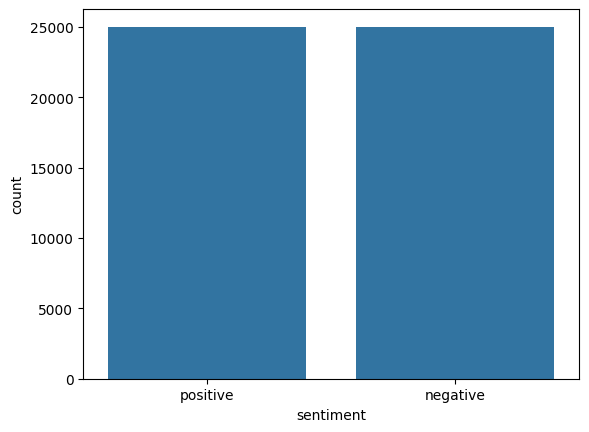

In [5]:
sns.countplot(x='sentiment', data=data)

In [6]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [7]:
data['cleaned_review'] = data['review'].apply(preprocess_text)
print("Sample of Cleaned Reviews:")
print(data['cleaned_review'].head())

Sample of Cleaned Reviews:
0    one reviewers mentioned watching oz episode yo...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: cleaned_review, dtype: object


In [8]:
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])  # 0 = negative, 1 = positive
y = to_categorical(data['sentiment_encoded'], num_classes=2)

In [9]:
max_words = 5000  
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['cleaned_review'])
sequences = tokenizer.texts_to_sequences(data['cleaned_review'])
X = pad_sequences(sequences, maxlen=max_len)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 40000, Test samples: 10000


In [11]:
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))  
model.add(Dropout(0.2))                                     
model.add(LSTM(32))                                         
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))                   

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          640000    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 660674 (2.52 MB)
Trainable params: 660674 (2.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


1250/1250 [==============================] - 33s 25ms/step - loss: 0.3463 - accuracy: 0.8467 - val_loss: 0.2958 - val_accuracy: 0.8746
Epoch 2/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.2517 - accuracy: 0.8977 - val_loss: 0.2980 - val_accuracy: 0.8710
Epoch 3/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.2083 - accuracy: 0.9171 - val_loss: 0.3120 - val_accuracy: 0.8718
Epoch 4/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.1701 - accuracy: 0.9349 - val_loss: 0.3322 - val_accuracy: 0.8682
Epoch 5/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.1392 - accuracy: 0.9469 - val_loss: 0.3844 - val_accuracy: 0.8650
Epoch 6/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.1134 - accuracy: 0.9585 - val_loss: 0.4818 - val_accuracy: 0.8635
Epoch 7/10
1250/1250 [==============================] - 32s 25ms/step - loss: 0.0959 - accuracy: 0.9650 - val_loss: 0.4735

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 [==============================] - 3s 8ms/step - loss: 0.7525 - accuracy: 0.8526
Test Accuracy: 85.26%


In [14]:
model.save('sentiment_lstm_model')
import pickle
with open('tokenizer_binary.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('label_encoder_binary.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
print("Model and tools saved successfully!")

INFO:tensorflow:Assets written to: sentiment_lstm_model\assets


INFO:tensorflow:Assets written to: sentiment_lstm_model\assets


Model and tools saved successfully!


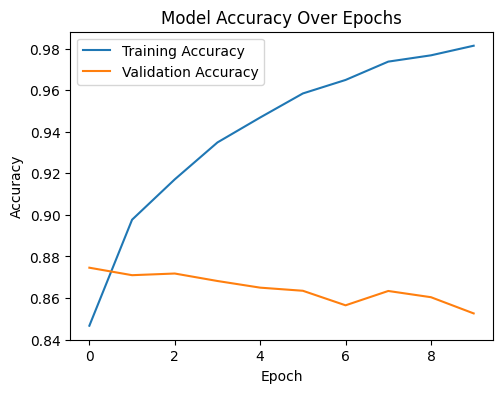

In [15]:
plt.figure(figsize=(12, 4))
# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

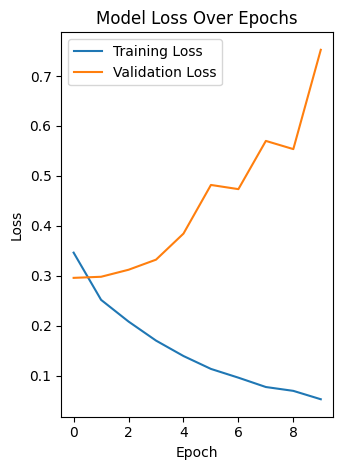

In [16]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 [==============================] - 3s 9ms/step


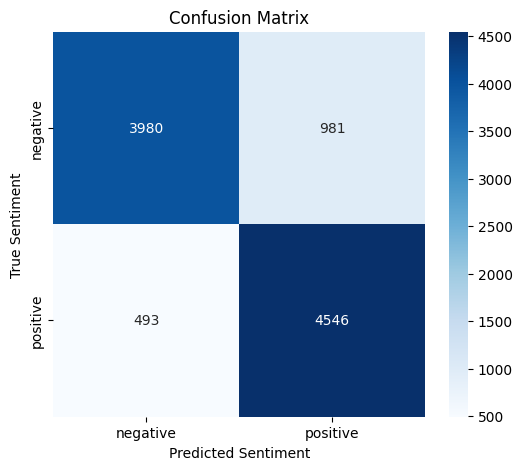

In [17]:
# Confusion Matrix Visualization
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.show()

In [18]:
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.80      0.84      4961
    positive       0.82      0.90      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [19]:
def predict_sentiment(review, model, tokenizer, label_encoder, max_len=200):
    text = review.lower()
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_review = ' '.join(tokens)
    
    sequence = tokenizer.texts_to_sequences([cleaned_review])
    padded = pad_sequences(sequence, maxlen=max_len)
    
    prediction = model.predict(padded)
    sentiment_idx = np.argmax(prediction)
    sentiment = label_encoder.inverse_transform([sentiment_idx])[0]
    confidence = prediction[0][sentiment_idx] * 100
    return sentiment, confidence

In [20]:
examples = [
    "This movie was absolutely fantastic, great acting and storyline!",
    "Terrible film, boring and poorly directed.",
    "I loved every minute of it, a true masterpiece.",
    "Waste of time, the plot made no sense.",
    "The visuals were stunning, but the script was awful."
]

print("Testing Sentiment Predictions on IMDB Reviews:")
for review in examples:
    sentiment, confidence = predict_sentiment(review, model, tokenizer, label_encoder)
    print(f"Review: '{review}'")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f}%)")
    print("-" * 50)

Testing Sentiment Predictions on IMDB Reviews:
1/1 [==============================] - 0s 407ms/step
Review: 'This movie was absolutely fantastic, great acting and storyline!'
Predicted Sentiment: positive (Confidence: 98.74%)
--------------------------------------------------
1/1 [==============================] - 0s 23ms/step
Review: 'Terrible film, boring and poorly directed.'
Predicted Sentiment: negative (Confidence: 100.00%)
--------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Review: 'I loved every minute of it, a true masterpiece.'
Predicted Sentiment: negative (Confidence: 54.55%)
--------------------------------------------------
1/1 [==============================] - 0s 26ms/step
Review: 'Waste of time, the plot made no sense.'
Predicted Sentiment: negative (Confidence: 99.98%)
--------------------------------------------------
1/1 [==============================] - 0s 26ms/step
Review: 'The visuals were stunning, but the scri